## Problem Statement

<font color="Green"> <h4> A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. </h4>

<font color="Purple"><h4><b> Objective </b></h4>

 You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem.


## 1. Module Import, Data Read and Function Declarations

In [1]:
import numpy as np
import pandas as pd
import warnings as wrn


import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from seaborn import countplot
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


import sklearn.metrics as met
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale as scale1

import csv

wrn.filterwarnings('ignore')

In [2]:
## ***** Import the training dataset | Start ***** 
df=pd.read_csv("train.csv",sep=',',encoding="ISO-8859-1")
## ***** Import the training dataset | End ***** 

In [3]:
## ***** Check the training dataset | Start *****
df.describe()
## ***** Check the training dataset | End ***** 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
## ***** Check the training dataset - rows and columns | Start *****
df.shape
## ***** Check the training dataset - rows and columns | End ***** 

(42000, 785)

In [5]:
## ***** Check the training dataset - datacheck | Start *****
df.head()
## ***** Check the training dataset - datacheck | End ***** 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
## ***** Check the training dataset - columns | Start *****
print(df.columns)
## ***** Check the training dataset - columns | End ***** 

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
## ****** Lets see some important facts of the dataset ****** | Start
df.describe()
## ****** Lets see some important facts of the dataset ****** | End

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### <font color="brown">1.1. Functions Bay

In [8]:
## ***** Get the percentage of Nulls | Start *****
def getNullperc(df):
    perdf = (df.isna().sum()/len(df)*100).to_frame()[0].sort_values(ascending=False).rename(columns={0:'Percentage'})
    return perdf
## Get the percentage of Nulls | End

## ***** Function to define the creation of boxplots ***** | Start ## 
def plotbox(col,n):
    sns.set(style="darkgrid")
    sns.set_context('talk')
    sns.set(font_scale=1.5)
    plt.figure(figsize=(35,10))
    #plt.subplot(18,2,n)
    sns.boxplot(x=col,data=df_viz,palette=("viridis"))
    plt.title('Figure ' + str(n) +' -  '+ col)
    plt.show()
## ***** Function to define the creation of boxplots ***** | End ##

## ***** Plotting bar | Start *****
def plotbar(col,lx,ly,title,b):
    sns.set(style="darkgrid")
    sns.set_context('talk')
    sns.set(font_scale=1.5)
    plt.figure(figsize=(16,6))
    ax = (col).plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel(ly, fontsize=16)
    ax.set_xlabel(lx, fontsize=16)
    plt.title(title)
    x_offset = -0.10
    y_offset = 0.02
    if(b==1):
        for p in ax.patches:
            b = p.get_bbox()
            val = "{:+.2f}".format(b.y1 + b.y0)        
            ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.show()
## ***** Plotting bar | End *****



In [9]:
## ****** Get the Sum of NULLs (if any) ****** | Start
getNullperc(df)
## ****** Get the Sum of NULLs (if any) ****** | End

pixel783    0.0
pixel267    0.0
pixel265    0.0
pixel264    0.0
pixel263    0.0
pixel262    0.0
pixel261    0.0
pixel260    0.0
pixel259    0.0
pixel258    0.0
pixel257    0.0
pixel256    0.0
pixel255    0.0
pixel254    0.0
pixel253    0.0
pixel252    0.0
pixel251    0.0
pixel250    0.0
pixel249    0.0
pixel248    0.0
pixel247    0.0
pixel246    0.0
pixel245    0.0
pixel266    0.0
pixel268    0.0
pixel390    0.0
pixel269    0.0
pixel290    0.0
pixel289    0.0
pixel288    0.0
           ... 
pixel495    0.0
pixel494    0.0
pixel493    0.0
pixel492    0.0
pixel491    0.0
pixel512    0.0
pixel513    0.0
pixel514    0.0
pixel526    0.0
pixel535    0.0
pixel534    0.0
pixel533    0.0
pixel532    0.0
pixel531    0.0
pixel530    0.0
pixel529    0.0
pixel528    0.0
pixel527    0.0
pixel525    0.0
pixel515    0.0
pixel524    0.0
pixel523    0.0
pixel522    0.0
pixel521    0.0
pixel520    0.0
pixel519    0.0
pixel518    0.0
pixel517    0.0
pixel516    0.0
label       0.0
Length: 785, dtype: floa

<b> Being image data the columns have no Nulls it seems so we do not need to do any Null treatment for our dataset </b>

## 2. Data Preparation & EDA

### 2.2. Sampling out the data from main data

In [10]:
## ***** Get 20% of the total data | Start *****
df_sample = df.sample(frac=0.2,random_state=100)
## ***** Get 20% of the total data | End *****
df_sample.shape

(8400, 785)

In [11]:
## ***** Get the difference of the main and the sample data | Start ***** 
df_out=pd.concat([df_sample,df]).drop_duplicates(keep=False)
## ***** Get the difference of the main and the sample data | End ***** 

In [12]:
print("Length of the sample:"+str(len(df_sample)))
print("Length of the original - sample:"+str(len(df_out)))

Length of the sample:8400
Length of the original - sample:33600


We have sampled out 20% of the data from the original dataset and we will use this dataset

### 2.3. Data Vizualization

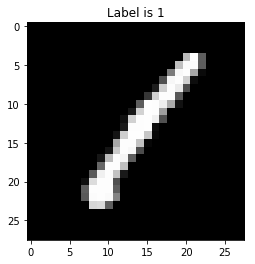

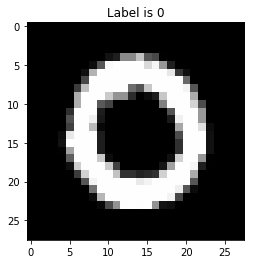

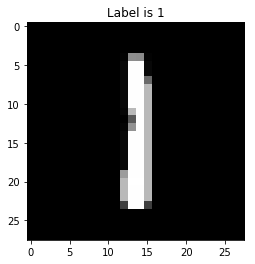

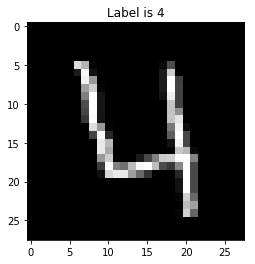

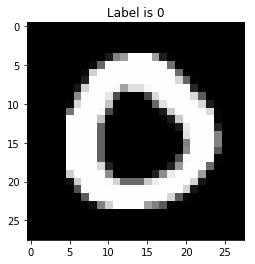

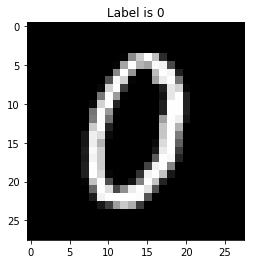

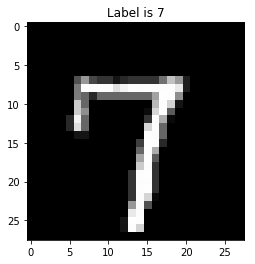

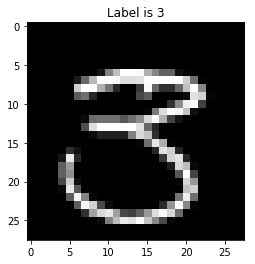

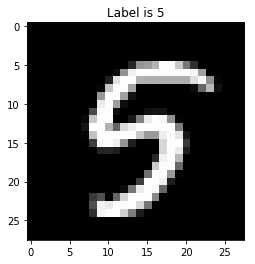

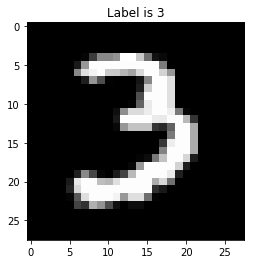

In [13]:
## ******* Show the handwritten image from the dataset (First 10) ****** | Start
df_image = df.head(10)
for row in range(0,10):
    df_img=df_image.iloc[row]
    pixels=df_img[1:]
    label=img_label=df_img['label']
    pixels=np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28,28))
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()
## ******* Show the handwritten image from the dataset (First 10) ****** | Start

In [14]:
## ***** Check the number of zeros in the fields, these wont give us much variance ***** | Start
df_temp=(df.isin([0]).sum()/len(df)*100).to_frame().reset_index().sort_values(0,ascending=True).rename(columns={0:'zero_perc'})

df_temp.sort_values(by='zero_perc',ascending=False)
## ***** Check the number of zeros in the fields, these wont give us much variance ***** | End

,index,zero_perc
784,pixel783,100.000000
6,pixel5,100.000000
1,pixel0,100.000000
9,pixel8,100.000000
10,pixel9,100.000000
11,pixel10,100.000000
12,pixel11,100.000000
27,pixel26,100.000000
3,pixel2,100.000000
761,pixel760,100.000000


In [15]:
len(df_temp[df_temp.zero_perc==100])

76

<b> From the above we can see that there are 76 columns which uses black scale throughout the dataset </b>

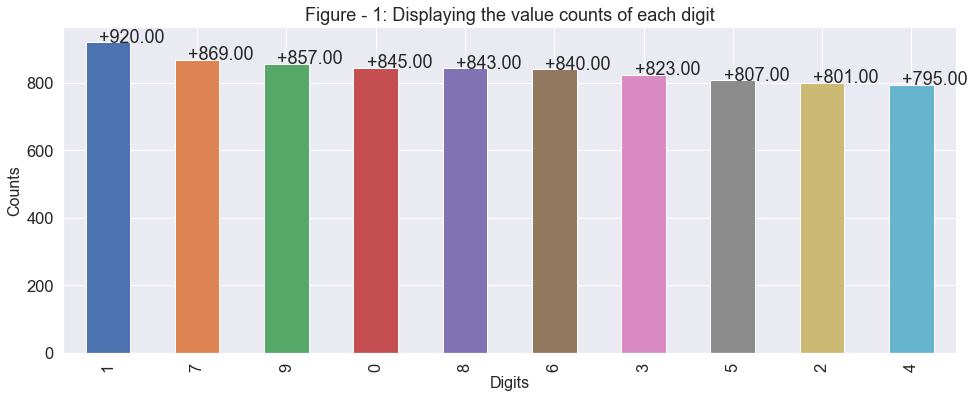

In [16]:
## Get the value counts of the labels | Start 
df_sample['label'].value_counts()

plotbar(df_sample['label'].value_counts(),'Digits','Counts','Figure - 1: Displaying the value counts of each digit',1)
## Get the value counts of the labels | End 

In [17]:
df_feature_sum=df_sample.groupby('label').sum().reset_index()
df_feature_sum

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,2104,566,264,177,22,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,322,404,288,76,0,0,0,0,0,0


<Figure size 1152x432 with 0 Axes>

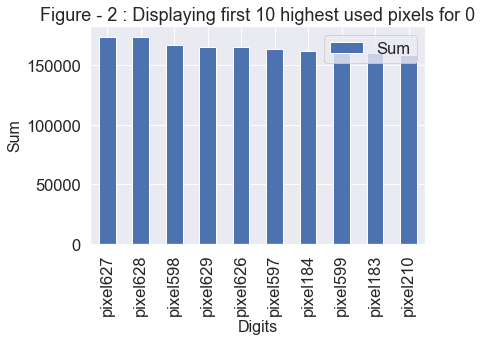

<Figure size 1152x432 with 0 Axes>

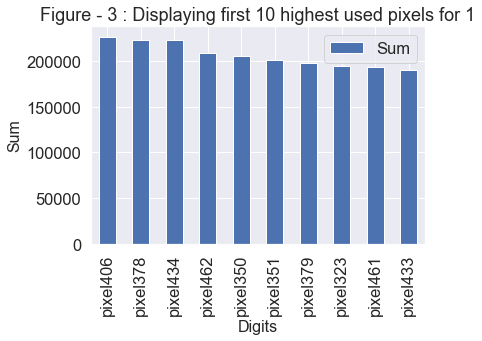

<Figure size 1152x432 with 0 Axes>

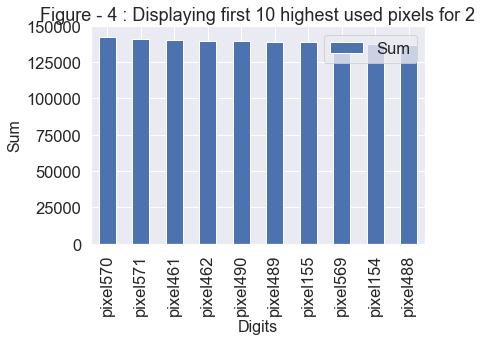

<Figure size 1152x432 with 0 Axes>

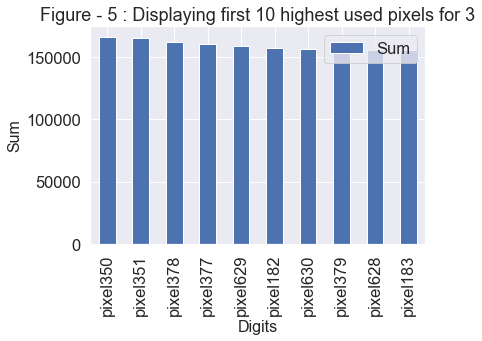

<Figure size 1152x432 with 0 Axes>

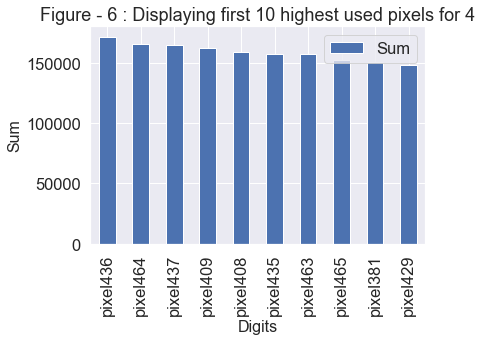

<Figure size 1152x432 with 0 Axes>

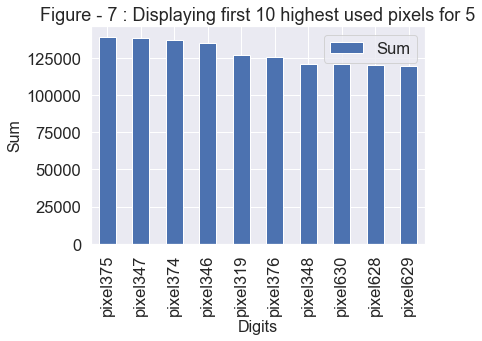

<Figure size 1152x432 with 0 Axes>

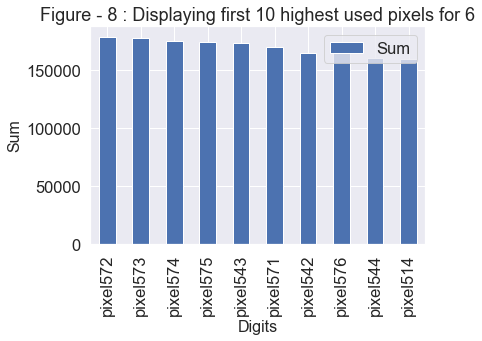

<Figure size 1152x432 with 0 Axes>

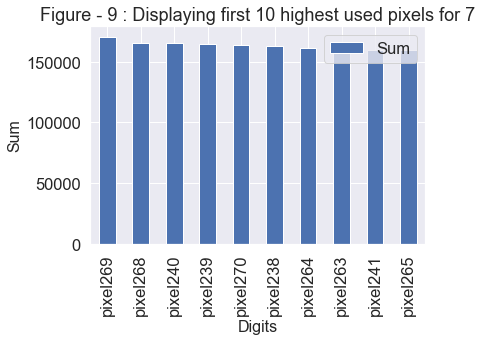

<Figure size 1152x432 with 0 Axes>

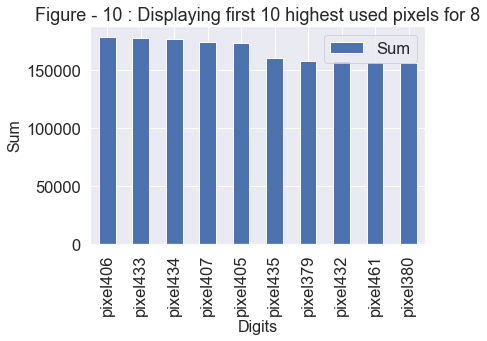

<Figure size 1152x432 with 0 Axes>

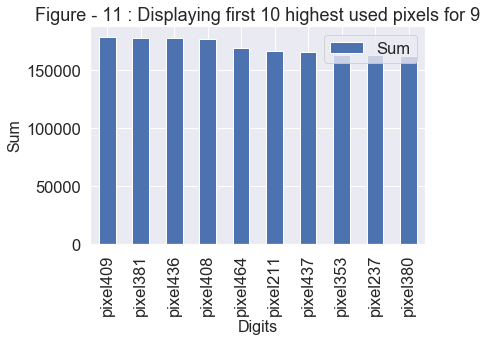

In [18]:
## ****** Display the first 10 pixels used in each digits ****** | Start
for i in range(0,10):
    df_digits=df_feature_sum[df_feature_sum['label']==i].max().sort_values(ascending=False).to_frame().rename(columns={0:'Sum'})
    title = "Figure - " +str(i+2)+" : Displaying first 10 highest used pixels for "+str(i)
    plotbar(df_digits.head(10),'Digits','Sum',title,0)
## ****** Display the first 10 pixels used in each digits ****** | End

####                      **************** 10 charts are shown below *******************

In [19]:
df_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21028,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7969,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16537,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36659,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Model Building

In [20]:
## ***** Drop the output variable | Start *****
#df_sample_0=df_sample[df_sample.label==0]
X = df_sample.drop('label',axis=1)
y=df_sample.label
cols=X.columns
## ***** Drop the output variable | End *****

### 3.1 Train Test Split

In [21]:
## ****** Train Test Split ***** | Start
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
## ****** Train Test Split ***** | End

In [22]:
## ***** Prepare the rest of the data for testing later ***** | Start
X_test_out = df_out.drop('label',axis=1)
y_out = df_out.label
## ***** Prepare the rest of the data for testing later ***** | End

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test_out.shape)

(5880, 784)
(2520, 784)
(5880,)
(2520,)
(33600, 784)


In [24]:
## ***** Scaling of the data ***** | Start
#scalar=StandardScaler()
#X_train[cols] = scalar.fit_transform(X_train[cols])
#X_test[cols] = scalar.fit_transform(X_test[cols])
#X_test_out[cols]=scalar.fit_transform(X_test_out[cols])
## ***** Scaling of the data ***** | End

In [25]:
## ***** Scaling of the data ***** | Start
X_train[cols] = X_train[cols].apply(lambda x: x/255)
X_test[cols] = X_test[cols].apply(lambda x: x/255)
X_test_out[cols] = X_test_out[cols].apply(lambda x: x/255)
## ***** Scaling of the data ***** | End

### 3.2. Model building using Linear Kernel

In [26]:
## ***** Defining the folds for Cross validation ***** | Start
kfolds = KFold(n_splits=5, shuffle=True, random_state=101)
## ***** Defining the folds for Cross validation ***** | End

In [27]:
## ***** Set the hyperparamters to us in Cross Validation ***** | Start
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
hyper_param_lin = [ {'C': [0.001,0.01,0.1,0.5,1]}]
## ***** Set the hyperparamters to us in Cross Validation ***** | End

In [28]:
## ***** Linear Model Building | Start *****
model_linear = SVC(kernel='linear')

gridCV=GridSearchCV(estimator=model_linear,
                   param_grid=hyper_param_lin,
                   scoring='accuracy',
                   cv=kfolds,
                   verbose=1,
                   return_train_score=True,
                   n_jobs=-1)
gridCV.fit(X_train,y_train)
## ***** Linear Model Building | End *****

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

Total time taken to run the job was <b> 2.3 mins </b> with 4 concurrent threads

In [29]:
## ***** Print the Grid results ***** | Start
linear_results = pd.DataFrame(gridCV.cv_results_)
linear_results.reset_index()
## ***** Print the Grid results ***** | End

,index,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,20.721296,0.764574,4.948227,0.141606,0.001,{'C': 0.001},0.892857,0.880952,0.866497,...,0.877381,0.008990,5,0.886692,0.886267,0.891156,0.891369,0.889668,0.889031,0.002168
1,1,8.323222,0.367569,2.807747,0.208137,0.01,{'C': 0.01},0.921769,0.924320,0.905612,...,0.912755,0.008548,1,0.930697,0.932611,0.938563,0.939838,0.936224,0.935587,0.003467
2,2,5.360979,0.386314,2.018055,0.069494,0.1,{'C': 0.1},0.926020,0.914116,0.911565,...,0.910884,0.010378,2,0.979804,0.976828,0.981080,0.981718,0.978316,0.979549,0.001791
3,3,5.058606,0.057043,1.986267,0.067834,0.5,{'C': 0.5},0.910714,0.906463,0.901361,...,0.901190,0.006811,3,0.997236,0.997236,0.997874,0.997449,0.997236,0.997406,0.000248
4,4,4.928800,0.140398,1.870068,0.118304,1,{'C': 1},0.905612,0.903912,0.902211,...,0.899320,0.005782,4,0.999575,0.999150,0.999575,0.998937,0.999787,0.999405,0.000312


In [30]:
## ***** Print the test score for each folds with various C ***** | Start
linear_results.groupby('param_C')[['split0_test_score','split1_test_score',	'split2_test_score','split3_test_score','split4_test_score']].mean()
## ***** Print the test score for each folds with various C ***** | End

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
param_C,,,,,
0.001,0.892857,0.880952,0.866497,0.873299,0.873299
0.010,0.921769,0.924320,0.905612,0.903912,0.908163
0.100,0.926020,0.914116,0.911565,0.893707,0.909014
0.500,0.910714,0.906463,0.901361,0.892857,0.894558
1.000,0.905612,0.903912,0.902211,0.891156,0.893707


In [31]:
## ***** Print the train score for each folds with various C ***** | Start
linear_results.groupby('param_C')[['split0_train_score','split1_train_score',	'split2_train_score','split3_train_score','split4_train_score']].mean()
## ***** Print the train score for each folds with various C ***** | Start

,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score
param_C,,,,,
0.001,0.886692,0.886267,0.891156,0.891369,0.889668
0.010,0.930697,0.932611,0.938563,0.939838,0.936224
0.100,0.979804,0.976828,0.981080,0.981718,0.978316
0.500,0.997236,0.997236,0.997874,0.997449,0.997236
1.000,0.999575,0.999150,0.999575,0.998937,0.999787


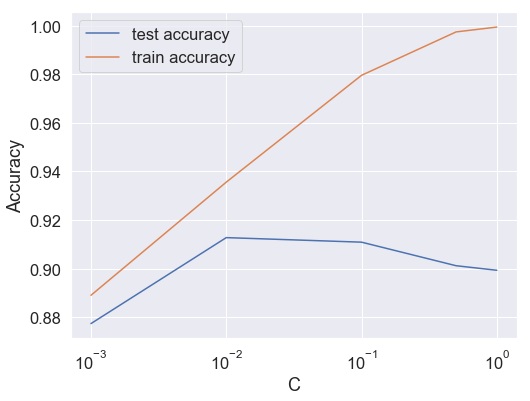

In [32]:
## ******* Plot the relationship graph for C and train and test accuracy ******* | Start
plt.figure(figsize=(8, 6))
plt.plot(linear_results['param_C'], linear_results['mean_test_score'])
plt.plot(linear_results['param_C'], linear_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
## ******* Plot the relationship graph for C and train and test accuracy ******* | End

<center> <b> From above graph it is quite clear that if we choose C==0.01, then we will have a better model , more than that will overfit the model </b> </center>

In [33]:
## ***** printing the optimal accuracy score and hyperparameters ***** | Start
best_score = gridCV.best_score_
best_hyperparams = gridCV.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
## ***** printing the optimal accuracy score and hyperparameters ***** | End

The best test score is 0.9127551020408163 corresponding to hyperparameters {'C': 0.01}


<b> Though the best score is shown as with C=0.01, to keep our model simple </b>

In [34]:
# ***** execute the optimal hyperparameters with  linear model ***** |Start
# model
model_linear = SVC(C=0.01,kernel="linear")

model_linear.fit(X_train, y_train)
# ***** execute the optimal hyperparameters with  linear model ***** |End

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### 3.3. Model Prediction

In [35]:
## ***** Predicting the values of test data ***** | Start
y_pred = model_linear.predict(X_test)


print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
## ***** Predicting the values of test data ***** | End

[[224   0   1   0   0   0   0   0   0   0]
 [  0 264   1   0   2   0   0   0   3   0]
 [  0   2 216   4   4   3   4   1   4   1]
 [  3   3   1 225   0  10   1   1  10   4]
 [  0   0   1   0 232   0   1   0   0  11]
 [  0   3   2   8   2 232   3   0   4   0]
 [  2   2   3   0   0   4 251   0   0   0]
 [  0   2   7   2   4   1   0 232   0  10]
 [  4   5   2   4   2   4   6   2 223   4]
 [  2   3   1   4  10   1   0   5   3 224]] 

accuracy 0.9218253968253968


The model accuracy came as 0.921 using iur linear model

#### 3.4.1. Time to check class wise accuracy
<br> We are using the left over data (around 33600) datapoints from the original dataset. This is the set which is left over after the 20/80 split from the original dataset. So this has become my heldout set

In [36]:
## ****** Get the class wise report for the test and predicted and form a Dataframe ***** | Start
print(" *************** Classification Report  *************** \n")
print(metrics.classification_report(y_test,y_pred))

## ****** Get the class wise report for the test and predicted and form a Dataframe ***** | End

 *************** Classification Report  *************** 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       225
           1       0.93      0.98      0.95       270
           2       0.92      0.90      0.91       239
           3       0.91      0.87      0.89       258
           4       0.91      0.95      0.93       245
           5       0.91      0.91      0.91       254
           6       0.94      0.96      0.95       262
           7       0.96      0.90      0.93       258
           8       0.90      0.87      0.89       256
           9       0.88      0.89      0.88       253

   micro avg       0.92      0.92      0.92      2520
   macro avg       0.92      0.92      0.92      2520
weighted avg       0.92      0.92      0.92      2520



<b> We can see the scores are not skewed towards any particular level but are well within comparable ranges within the label class </b>

<center> We can see that the <b> F1-Score, Precision and Recall </b> values for each class are all very close and comparable for all the classes, as all the label classes have precision of 0.9 and the overall accuracy of the model came out as 0.9 too</center>

#### 3.4.2 Comments after executing SVM using Linear Kernel

After executing the SVM using Linear Kernel, we can observe that the model performed preety well on the data. We have used the remaining 80% data (held out) for testing our model. The below are the model parameters used along with the results.

<br>
<table>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'>Model training, hyper-params & prediction</th>
    </tr>
    <tr>
        <th bgcolor='grey' colspan='2'>Train Score</th>
        <td  colspan='2'>0.91</td>
    </tr>
    <tr>
        <th bgcolor='#e1e2e3'  colspan='2'>C</th>
        <td  colspan='2'>0.01</td>
    </tr>
    <tr>
        <th bgcolor='grey'  colspan='2'>Overall Prediction Accuracy</th>
        <td  colspan='2'>0.92</td>
    </tr>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'>Class Wise - F1, Precision & Recall Scores</th>
    </tr>
    <tr>
        <th bgcolor='grey'>Number Label</th>
        <th bgcolor='grey'>Precision</th>
        <th bgcolor='grey'>Recall</th>
        <th bgcolor='grey'>F1-Score</th>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>7</td>
        <td bgcolor='#D7DCD4'>0.96</td>
        <td bgcolor='#D7DCD4'>0.90</td>
        <td bgcolor='#D7DCD4'>0.93</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>0</td>
        <td bgcolor='#f3f4f2'>0.95</td>
        <td bgcolor='#f3f4f2'>1.00</td>
        <td bgcolor='#f3f4f2'>0.97</td>
    </tr>
     <tr>
        <td bgcolor='#D7DCD4'>6</td>
        <td bgcolor='#D7DCD4'>0.94</td>
        <td bgcolor='#D7DCD4'>0.96</td>
        <td bgcolor='#D7DCD4'>0.95</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>1</td>
        <td bgcolor='#f3f4f2'>0.93</td>
        <td bgcolor='#f3f4f2'>0.98</td>
        <td bgcolor='#f3f4f2'>0.95</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>2</td>
        <td bgcolor='#D7DCD4'>0.92</td>
        <td bgcolor='#D7DCD4'>0.90</td>
        <td bgcolor='#D7DCD4'>0.91</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>4</td>
        <td bgcolor='#f3f4f2'>0.91</td>
        <td bgcolor='#f3f4f2'>0.94</td>
        <td bgcolor='#f3f4f2'>0.93</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>5</td>
        <td bgcolor='#D7DCD4'>0.91</td>
        <td bgcolor='#D7DCD4'>0.91</td>
        <td bgcolor='#D7DCD4'>0.91</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>3</td>
        <td bgcolor='#f3f4f2'>0.91</td>
        <td bgcolor='#f3f4f2'>0.87</td>
        <td bgcolor='#f3f4f2'>0.89</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>8</td>
        <td bgcolor='#D7DCD4'>0.90</td>
        <td bgcolor='#D7DCD4'>0.87</td>
        <td bgcolor='#D7DCD4'>0.89</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>9</td>
        <td bgcolor='#f3f4f2'>0.88</td>
        <td bgcolor='#f3f4f2'>0.89</td>
        <td bgcolor='#f3f4f2'>0.88</td>
    </tr>
</table>



### 3.6. Model building using RBF Kernel

In [37]:
## ****** Train Test Split ***** | Start
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
## ****** Train Test Split ***** | End

In [38]:
## ***** Prepare the rest of the data for testing later ***** | Start
X_test_out = df_out.drop('label',axis=1)
y_out = df_out.label
## ***** Prepare the rest of the data for testing later ***** | End

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test_out.shape)

(5880, 784)
(2520, 784)
(5880,)
(2520,)
(33600, 784)


In [40]:
## ***** Scaling of the data ***** | Start
X_train[cols] = X_train[cols].apply(lambda x: x/255)
X_test[cols] = X_test[cols].apply(lambda x: x/255)
X_test_out[cols] = X_test_out[cols].apply(lambda x: x/255)
## ***** Scaling of the data ***** | End

#### 3.6.1. Cross Validation

In [41]:
## ***** Get the RBF object and run the cross validation ***** | Start
model_rbf = SVC(kernel='rbf')

gridCV=GridSearchCV(estimator=model_rbf,
                   param_grid=hyper_params,
                   scoring='accuracy',
                   cv=kfolds,
                   verbose=1,
                   return_train_score=True,
                   n_jobs=-1)
gridCV.fit(X_train,y_train)
## ***** Get the RBF object and run the cross validation ***** | End

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

Total time taken to run the job was <b> 6.4 mins </b> with 4 concurrent threads

In [42]:
## ***** Get the results of the CV exection ***** | Start
rbf_results = pd.DataFrame(gridCV.cv_results_)
rbf_results.head()
## ***** Get the results of the CV exection ***** | End

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.671138,0.117996,2.729921,0.050286,1,0.01,"{'C': 1, 'gamma': 0.01}",0.948980,0.952381,0.937075,...,0.941327,0.008537,4,0.976828,0.973214,0.974702,0.976403,0.976828,0.975595,0.001425
1,14.064634,0.102722,3.926346,0.071982,1,0.001,"{'C': 1, 'gamma': 0.001}",0.907313,0.903912,0.885204,...,0.894728,0.009429,10,0.905400,0.905612,0.909651,0.910289,0.908588,0.907908,0.002036
2,34.317843,0.401865,5.554973,0.090323,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.736395,0.778061,0.770408,...,0.756803,0.016053,12,0.754464,0.766794,0.772959,0.750425,0.767432,0.762415,0.008515
3,7.531543,0.112618,2.555912,0.058241,10,0.01,"{'C': 10, 'gamma': 0.01}",0.959184,0.959184,0.957483,...,0.953061,0.006832,1,1.000000,0.999787,0.999575,0.999575,0.999787,0.999745,0.000159
4,6.528415,0.064429,2.384130,0.058471,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933673,0.930272,0.914966,...,0.921769,0.010929,5,0.953869,0.951318,0.954932,0.958971,0.955782,0.954974,0.002499


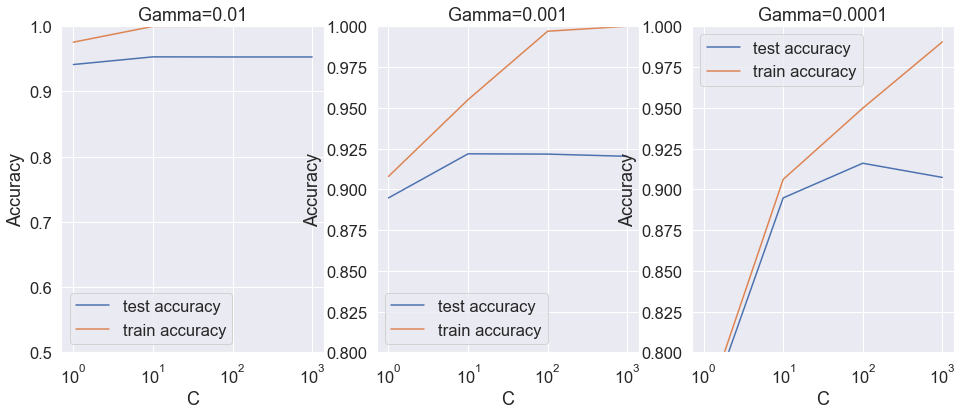

In [43]:
## ***** Plot the Cross Validation results to decide the hyperparameters ***** | Start
# converting C to numeric type for plotting on x-axis
rbf_results['param_C'] = rbf_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = rbf_results[rbf_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='bottom left')
plt.xscale('log')


# subplot 2/3
plt.subplot(132)
gamma_001 = rbf_results[rbf_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='bottom left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = rbf_results[rbf_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='bottom left')
plt.xscale('log')
plt.show()
## ***** Plot the Cross Validation results to decide the hyperparameters ***** | Start

In [44]:
## ***** printing the optimal accuracy score and hyperparameters ***** | Start
best_score = gridCV.best_score_
best_hyperparams = gridCV.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
## ***** printing the optimal accuracy score and hyperparameters ***** | End

The best test score is 0.9530612244897959 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


<center> <b> Though the best score comes at gamma = 0.01, but we can simply using C=10 and gamma = 0.001 </b>, as complex models may have a chance of overfitting the data</center>

#### 3.6.2. Prediction

In [45]:
# ***** execute the optimal hyperparameters with  linear model ***** |Start

# model
model_rbf = SVC(C=10,gamma=0.001,kernel="rbf")

model_rbf.fit(X_train, y_train)
# ***** execute the optimal hyperparameters with  linear model ***** |End

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
print(y_test.shape)
print(X_test.shape)

(2520,)
(2520, 784)


In [47]:
## ***** Predicting the values of test data ***** | Start
y_pred = model_rbf.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
## ***** Predicting the values of test data ***** | End

[[224   0   1   0   0   0   0   0   0   0]
 [  0 263   1   0   2   0   0   1   3   0]
 [  0   2 218   3   4   2   4   2   3   1]
 [  1   3   1 234   0   5   1   1   9   3]
 [  0   0   0   0 232   0   2   0   0  11]
 [  0   3   1   4   1 238   2   0   5   0]
 [  2   2   3   0   0   2 253   0   0   0]
 [  0   1   5   3   4   1   0 237   0   7]
 [  4   5   3   3   2   6   4   2 223   4]
 [  2   3   1   2   9   1   0   6   1 228]] 

accuracy 0.9325396825396826


In [48]:
## ****** Get the class wise report for the test and predicted and form a Dataframe ***** | Start
print(" *************** Classification Report  *************** \n")
print(metrics.classification_report(y_test,y_pred))


 *************** Classification Report  *************** 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       225
           1       0.93      0.97      0.95       270
           2       0.93      0.91      0.92       239
           3       0.94      0.91      0.92       258
           4       0.91      0.95      0.93       245
           5       0.93      0.94      0.94       254
           6       0.95      0.97      0.96       262
           7       0.95      0.92      0.93       258
           8       0.91      0.87      0.89       256
           9       0.90      0.90      0.90       253

   micro avg       0.93      0.93      0.93      2520
   macro avg       0.93      0.93      0.93      2520
weighted avg       0.93      0.93      0.93      2520



<b> We can see the scores are not skewed towards any particular level but are well within comparable ranges within the label class </b>

<center> We can see that the <b> F1-Score, Precision and Recall </b> values for each class are all very close and comparable for all the classes </center>

After executing the SVM using RBF Kernel, we can observe that the model performed preety well on the data.
<br> Especially in linear model some of the digit like 9 were a bit low on accuracy, but in RBF all the digits have a precision of greater than or equal to model overall precision of 0.9
<br>We have used the remaining 80% data (held out) for testing our model. The below are the model parameters used along with the results.

<br>
<table>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'>Model training, hyper-params & prediction</th>
    </tr>
    <tr>
        <th bgcolor='grey' colspan='2'>Train Score</th>
        <td  colspan='2'>0.95</td>
    </tr>
    <tr>
        <th bgcolor='#e1e2e3' colspan='2'>Gamma value</th>
        <td  colspan='2'>0.001</td>
    </tr>
    <tr>
        <th bgcolor='grey'  colspan='2'>C value</th>
        <td  colspan='2'>10</td>
    </tr>
    <tr>
        <th bgcolor='#e1e2e3'  colspan='2'>Overall Prediction Accuracy</th>
        <td  colspan='2'>0.93</td>
    </tr>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'>Class Wise - F1, Precision & Recall Scores</th>
    </tr>
    <tr>
        <th bgcolor='grey'>Number Label</th>
        <th bgcolor='grey'>Precision</th>
        <th bgcolor='grey'>Recall</th>
        <th bgcolor='grey'>F1-Score</th>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>0</td>
        <td bgcolor='#D7DCD4'>0.96</td>
        <td bgcolor='#D7DCD4'>0.91</td>
        <td bgcolor='#D7DCD4'>0.98</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>6</td>
        <td bgcolor='#f3f4f2'>0.95</td>
        <td bgcolor='#f3f4f2'>0.97</td>
        <td bgcolor='#f3f4f2'>0.96</td>
    </tr>
     <tr>
        <td bgcolor='#D7DCD4'>7</td>
        <td bgcolor='#D7DCD4'>0.95</td>
        <td bgcolor='#D7DCD4'>0.92</td>
        <td bgcolor='#D7DCD4'>0.93</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>3</td>
        <td bgcolor='#f3f4f2'>0.94</td>
        <td bgcolor='#f3f4f2'>0.91</td>
        <td bgcolor='#f3f4f2'>0.92</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>1</td>
        <td bgcolor='#D7DCD4'>0.93</td>
        <td bgcolor='#D7DCD4'>0.97</td>
        <td bgcolor='#D7DCD4'>0.95</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>2</td>
        <td bgcolor='#f3f4f2'>0.93</td>
        <td bgcolor='#f3f4f2'>0.91</td>
        <td bgcolor='#f3f4f2'>0.92</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>5</td>
        <td bgcolor='#D7DCD4'>0.93</td>
        <td bgcolor='#D7DCD4'>0.94</td>
        <td bgcolor='#D7DCD4'>0.94</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>4</td>
        <td bgcolor='#f3f4f2'>0.91</td>
        <td bgcolor='#f3f4f2'>0.95</td>
        <td bgcolor='#f3f4f2'>0.93</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>8</td>
        <td bgcolor='#D7DCD4'>0.91</td>
        <td bgcolor='#D7DCD4'>0.87</td>
        <td bgcolor='#D7DCD4'>0.89</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>9</td>
        <td bgcolor='#f3f4f2'>0.90</td>
        <td bgcolor='#f3f4f2'>0.90</td>
        <td bgcolor='#f3f4f2'>0.90</td>
    </tr>
</table>




#### 3.6.3 Comments after executing SVM using RBF Kernel

<center>The Training score , overall prediction score and class wise score on the held out dataset has improved in RBF than the Linear model. All the scores are very near to 0.9 or more than that , thus we choose the RBF over Linear. We will build our model with Polynomial Kernel in the next section to check and compare. 
<br> We can see the difference between the highest </center>

### 3.7. Model building using Polynomial Kernel

In [49]:
## ****** Train Test Split ***** | Start
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
## ****** Train Test Split ***** | End

In [50]:
## ***** Prepare the rest of the data for testing later ***** | Start
X_test_out = df_out.drop('label',axis=1)
y_out = df_out.label
## ***** Prepare the rest of the data for testing later ***** | End

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test_out.shape)

(5880, 784)
(2520, 784)
(5880,)
(2520,)
(33600, 784)


In [52]:
## ***** Scaling of the data ***** | Start
X_train[cols] = X_train[cols].apply(lambda x: x/255)
X_test[cols] = X_test[cols].apply(lambda x: x/255)
X_test_out[cols] = X_test_out[cols].apply(lambda x: x/255)
## ***** Scaling of the data ***** | End

#### 3.7.1. Cross Validation

In [53]:
## ***** Get the Polynomial object and run the cross validation ***** | Start
model_poly = SVC(kernel='poly')

gridCV=GridSearchCV(estimator=model_poly,
                   param_grid=hyper_params,
                   scoring='accuracy',
                   cv=kfolds,
                   verbose=1,
                   return_train_score=True,
                   n_jobs=-1)
gridCV.fit(X_train,y_train)
## ***** Get the Polynomial object and run the cross validation ***** | End

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

Total time taken to run the job was <b> 12.2 mins </b> with 4 concurrent threads

In [54]:
## ***** Get the results of the CV exection ***** | Start
poly_results = pd.DataFrame(gridCV.cv_results_)
poly_results.head()
## ***** Get the results of the CV exection ***** | End

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.347584,0.071017,2.550186,0.031051,1,0.01,"{'C': 1, 'gamma': 0.01}",0.928571,0.920068,0.909014,...,0.916497,0.007223,4,0.958759,0.958971,0.956633,0.958546,0.960459,0.958673,0.001222
1,41.683922,0.268375,5.961554,0.065187,1,0.001,"{'C': 1, 'gamma': 0.001}",0.119898,0.107993,0.105442,...,0.110544,0.004958,8,0.108206,0.111182,0.111820,0.110544,0.111182,0.110587,0.001257
2,42.143277,0.263334,5.818259,0.176504,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.119898,0.107993,0.105442,...,0.110544,0.004958,8,0.108206,0.111182,0.111820,0.110544,0.110969,0.110544,0.001240
3,7.814597,0.418258,1.994122,0.085916,10,0.01,"{'C': 10, 'gamma': 0.01}",0.943027,0.943878,0.941327,...,0.938776,0.005045,3,0.996599,0.997874,0.996386,0.997449,0.997449,0.997151,0.000564
4,50.761840,1.852583,6.987089,0.405752,10,0.001,"{'C': 10, 'gamma': 0.001}",0.280612,0.298469,0.281463,...,0.281293,0.009701,7,0.294005,0.288053,0.272321,0.294005,0.293367,0.288350,0.008320


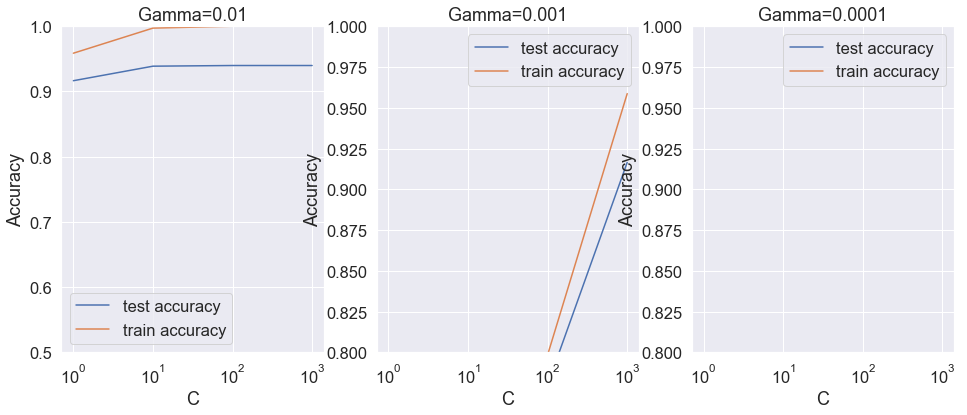

In [55]:
## ***** Plot the Cross Validation results to decide the hyperparameters ***** | Start
# converting C to numeric type for plotting on x-axis
poly_results['param_C'] = poly_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = poly_results[poly_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='bottom left')
plt.xscale('log')


# subplot 2/3
plt.subplot(132)
gamma_001 = poly_results[poly_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='bottom left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = poly_results[poly_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='bottom left')
plt.xscale('log')
plt.show()
## ***** Plot the Cross Validation results to decide the hyperparameters ***** | Start

In [56]:
## ***** printing the optimal accuracy score and hyperparameters ***** | Start
best_score = gridCV.best_score_
best_hyperparams = gridCV.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
## ***** printing the optimal accuracy score and hyperparameters ***** | End

The best test score is 0.939795918367347 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


<center> <b> The best score comes at default Degree 3 and C value as 100</center>

#### 3.7.2. Prediction

In [57]:
# ***** execute the optimal hyperparameters with  linear model ***** |Start

# model
model_poly = SVC(C=100,gamma=0.01,kernel="poly")

model_poly.fit(X_train, y_train)
# ***** execute the optimal hyperparameters with  linear model ***** |End

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
print(y_test.shape)
print(X_test.shape)

(2520,)
(2520, 784)


In [59]:
## ***** Predicting the values of test data ***** | Start
y_pred = model_poly.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
## ***** Predicting the values of test data ***** | End

[[223   0   0   0   0   2   0   0   0   0]
 [  0 265   0   0   1   0   0   0   3   1]
 [  0   3 222   5   1   3   1   0   4   0]
 [  2   3   1 238   0   5   1   1   4   3]
 [  0   2   0   0 237   0   1   0   1   4]
 [  0   3   0   3   0 238   3   1   6   0]
 [  2   1   1   0   1   4 253   0   0   0]
 [  0   3   4   0   2   1   0 243   0   5]
 [  2   4   2   3   1   6   1   3 231   3]
 [  2   1   0   1   8   3   0   5   4 229]] 

accuracy 0.944047619047619


In [60]:
## ****** Get the class wise report for the test and predicted and form a Dataframe ***** | Start
print(" *************** Classification Report  *************** \n")
print(metrics.classification_report(y_test,y_pred))

## ****** Get the class wise report for the test and predicted and form a Dataframe ***** | End

 *************** Classification Report  *************** 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       225
           1       0.93      0.98      0.95       270
           2       0.97      0.93      0.95       239
           3       0.95      0.92      0.94       258
           4       0.94      0.97      0.96       245
           5       0.91      0.94      0.92       254
           6       0.97      0.97      0.97       262
           7       0.96      0.94      0.95       258
           8       0.91      0.90      0.91       256
           9       0.93      0.91      0.92       253

   micro avg       0.94      0.94      0.94      2520
   macro avg       0.94      0.94      0.94      2520
weighted avg       0.94      0.94      0.94      2520



<center> We can see that the <b> F1-Score, Precision and Recall </b> are very much comaparable as the class wise accuracy is same as 0.9 for all the labels </center>

After executing the Polynomial Kernel, we can observe that the model results are comparable to the overall accuracy is same as the classwise accuracy. We have used the remaining 80% data (held out) for testing our model. The below are the model parameters used along with the results.

<br>
<table>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'>Model training, hyper-params & prediction</th>
    </tr>
    <tr>
        <th bgcolor='grey' colspan='2'>Train Score</th>
        <td  colspan='2'>0.94</td>
    </tr>
    <tr>
        <th bgcolor='#e1e2e3' colspan='2'>Gamma value</th>
        <td  colspan='2'>0.01</td>
    </tr>
    <tr>
        <th bgcolor='grey'  colspan='2'>C value</th>
        <td  colspan='2'>100</td>
    </tr>
    <tr>
        <th bgcolor='#e1e2e3'  colspan='2'>Overall Prediction Accuracy</th>
        <td  colspan='2'>0.94</td>
    </tr>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'>Class Wise - F1, Precision & Recall Scores (Sorted over Precision)</th>
    </tr>
    <tr>
        <th bgcolor='grey'>Number Label</th>
        <th bgcolor='grey'>Precision</th>
        <th bgcolor='grey'>Recall</th>
        <th bgcolor='grey'>F1-Score</th>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>0</td>
        <td bgcolor='#D7DCD4'>0.97</td>
        <td bgcolor='#D7DCD4'>0.99</td>
        <td bgcolor='#D7DCD4'>0.98</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>2</td>
        <td bgcolor='#D7DCD4'>0.97</td>
        <td bgcolor='#D7DCD4'>0.93</td>
        <td bgcolor='#D7DCD4'>0.95</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>6</td>
        <td bgcolor='#f3f4f2'>0.97</td>
        <td bgcolor='#f3f4f2'>0.97</td>
        <td bgcolor='#f3f4f2'>0.97</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>7</td>
        <td bgcolor='#D7DCD4'>0.96</td>
        <td bgcolor='#D7DCD4'>0.94</td>
        <td bgcolor='#D7DCD4'>0.95</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>3</td>
        <td bgcolor='#f3f4f2'>0.95</td>
        <td bgcolor='#f3f4f2'>0.92</td>
        <td bgcolor='#f3f4f2'>0.94</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>4</td>
        <td bgcolor='#D7DCD4'>0.94</td>
        <td bgcolor='#D7DCD4'>0.97</td>
        <td bgcolor='#D7DCD4'>0.96</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>1</td>
        <td bgcolor='#f3f4f2'>0.93</td>
        <td bgcolor='#f3f4f2'>0.98</td>
        <td bgcolor='#f3f4f2'>0.95</td>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>9</td>
        <td bgcolor='#D7DCD4'>0.93</td>
        <td bgcolor='#D7DCD4'>0.91</td>
        <td bgcolor='#D7DCD4'>0.92</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>5</td>
        <td bgcolor='#f3f4f2'>0.91</td>
        <td bgcolor='#f3f4f2'>0.94</td>
        <td bgcolor='#f3f4f2'>0.92</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>8</td>
        <td bgcolor='#f3f4f2'>0.91</td>
        <td bgcolor='#f3f4f2'>0.90</td>
        <td bgcolor='#f3f4f2'>0.91</td>
    </tr>
</table>


#### 3.7.3 Comments after executing SVM using Polynomial Kernel

<center>The training score is 0.9397, whereas the predicted accuracy score on held out set is 0.94, which is almost same as the train set, and after checking the classwise accuracy we also see the precisions of the lables are almost same as the overall accuracy. <br>
</center>

### 3.8. Final Comments
<br> To check which is the better model,below is the comapritive study of the three models viz. <b> Linear, RBF and Polynomial </b>
<br>
<table>
    <tr>
        <th bgcolor='#37D1D3'>Models with Kernel</th>
        <th bgcolor='grey'>Accuracy</th>
    </tr>
    <tr>
        <td bgcolor='#faebd7'>Linear</td>
        <td>0.92</td>
    </tr>
    <tr>
        <td bgcolor='yellow'><b>RBF</b></td>
        <td bgcolor='yellow'><b>0.93</b></td>
    </tr>
    <tr>
        <td bgcolor='#faebd7'>Polynomial</td>
        <td>0.94</td>
    </tr>
</table>
<br>
<b> The RBF is best model in all factors where we have used C as 10 and Gamma as 0.001 (which are low as compared to Polynomial) and it has returned a good accuracy also.</b> The model using polynomial kernel performed well but it is hard on the resources and our cost function is also high (100) with low gamma (0.01). Also precision wise we are not loosing too much of the precision score still getting a good score using <b> RBF, </b> using  Whereas the Linear model though has given a good accuracy the class wise classification seems to be on the lower side for some digits which is much improved in Non Linear models.